In [74]:
import sys
sys.path.append("..")

In [75]:
import torch
import torchvision
import torchvision.transforms.v2 as T
import torchvision.transforms.v2.functional as F

import transforms
import visualize

## Dataset loading

In [76]:
dataroot = '../data/'

In [77]:
ds_train = torchvision.datasets.VOCSegmentation(root=dataroot, year="2012", image_set="train", download=False)

In [78]:
ds_train_v2 = torchvision.datasets.wrap_dataset_for_transforms_v2(ds_train)

In [79]:
tr_inv_norm = transforms.inv_normalize(transforms.PASCAL_VOC_2012_MEAN, transforms.PASCAL_VOC_2012_STD)

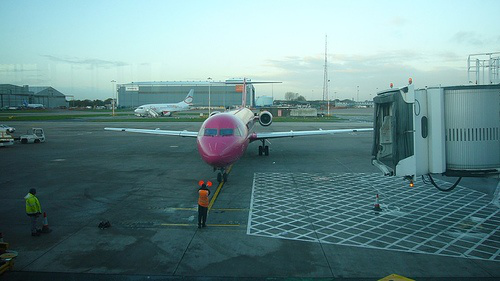

In [80]:
ds_train[0][0]

## Individual Transforms

In [81]:
def tensorinfo(t: torch.Tensor):
    info = "type=" + str(type(t))
    if not isinstance(t, torch.Tensor):
        return info
    
    info += "; dtype=" + str(t.dtype)
    info += "; shape=" + str(t.shape)
    info += "; minmax=" + str([t.min().item(), t.max().item()])
    return info

In [82]:
mean = transforms.PASCAL_VOC_2012_MEAN
std = transforms.PASCAL_VOC_2012_STD

In [83]:
input_sample = ds_train_v2[0]

In [84]:
img, mask = input_sample

In [85]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'PIL.Image.Image'>
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 281, 500]); minmax=[0, 255]


In [86]:
tr = T.ToImageTensor()

In [87]:
img, mask = tr(input_sample)

In [88]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.uint8; shape=torch.Size([3, 281, 500]); minmax=[0, 255]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 281, 500]); minmax=[0, 255]


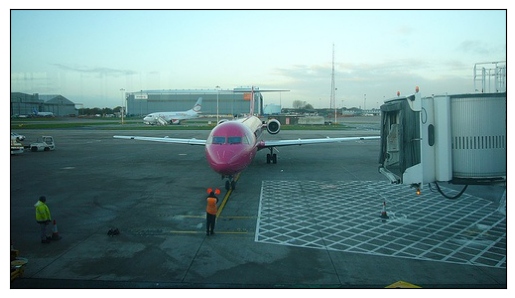

In [89]:
visualize.imshow_tensor(img)

### Clip superfluous mask classes (like boundary region)

Clip all classes higher than a maximum (20 for Pascal VOC) to be background.

In [90]:
tr = transforms.ClipMaskClasses(transforms.PASCAL_VOC_2012_CLASS_MAX)

In [91]:
tr_clipmask = tr

In [92]:
# save current sample state as starting point to show other transforms
input_sample = tr((img, mask))

In [93]:
img, mask = tr(input_sample)

In [94]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.uint8; shape=torch.Size([3, 281, 500]); minmax=[0, 255]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 281, 500]); minmax=[0, 15]


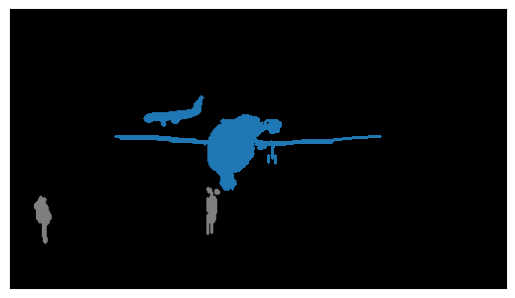

In [95]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

### Resize + Center crop

Maybe use for inference instead of RWP?

In [96]:
tr = T.Resize(256)

In [97]:
img, mask = tr(input_sample)

In [98]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.uint8; shape=torch.Size([3, 256, 455]); minmax=[0, 255]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 256, 455]); minmax=[0, 15]


In [99]:
tr = T.CenterCrop(256)

In [100]:
img, mask = tr((img, mask))

In [101]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.uint8; shape=torch.Size([3, 256, 256]); minmax=[0, 255]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 256, 256]); minmax=[0, 15]


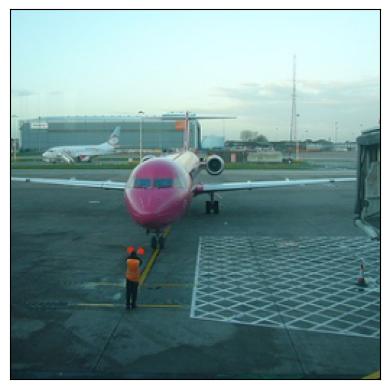

In [102]:
visualize.imshow_tensor(img)

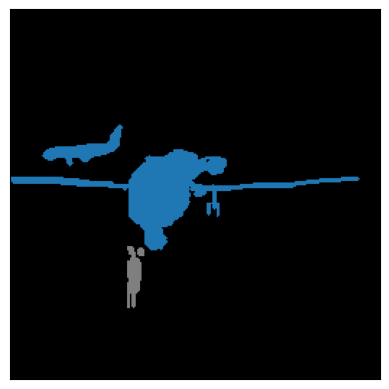

In [103]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

### Resize with pad

Applies to:
 - PIL
 - Tensor
 - Image
 - Mask

In [104]:
tr = transforms.Resize_with_pad(256,256)

In [105]:
img, mask = tr(input_sample)

In [106]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.uint8; shape=torch.Size([3, 256, 256]); minmax=[0, 255]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 256, 256]); minmax=[0, 15]


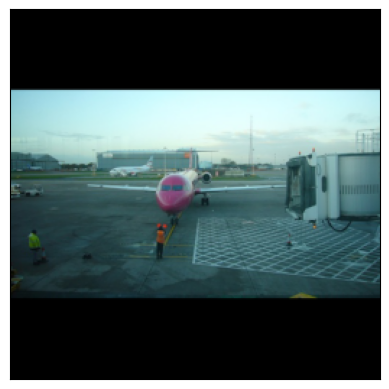

In [107]:
visualize.imshow_tensor(img)

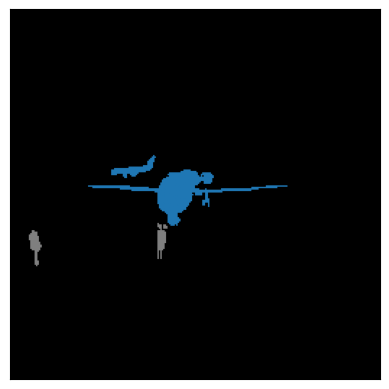

In [108]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

### Random Resized Crop

In [109]:
tr = T.RandomResizedCrop(size=256, scale=(0.3, 1.0), ratio=(1,1), antialias=True)

In [110]:
img, mask = tr(input_sample)

In [111]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.uint8; shape=torch.Size([3, 256, 256]); minmax=[0, 255]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 256, 256]); minmax=[0, 1]


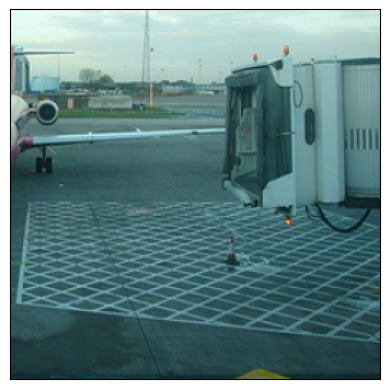

In [112]:
visualize.imshow_tensor(img)

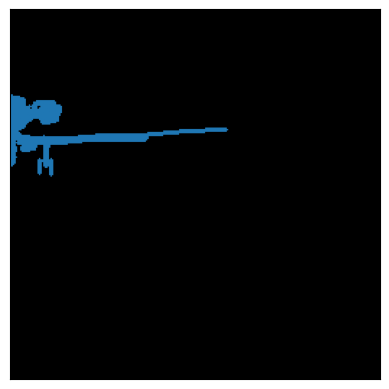

In [113]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

### Normalize

In [114]:
# float dtype required for normalization
tr = T.ConvertImageDtype(torch.float32)

In [115]:
img, mask = tr(input_sample)

In [116]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.float32; shape=torch.Size([3, 281, 500]); minmax=[0.0, 1.0]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 281, 500]); minmax=[0, 15]


In [117]:
tr = T.Normalize(mean=mean, std=std)

In [118]:
img, mask = tr((img, mask))

In [119]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.float32; shape=torch.Size([3, 281, 500]); minmax=[-2.1179039478302, 2.640000104904175]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 281, 500]); minmax=[0, 15]


In [120]:
torch.std_mean(img)

(tensor(1.3496), tensor(0.1822))

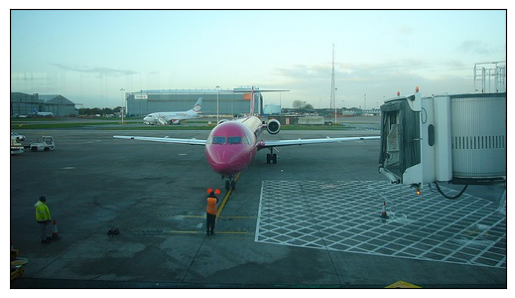

In [121]:
# apply reverse normalization transform to properly display image
visualize.imshow_tensor(tr_inv_norm(img))

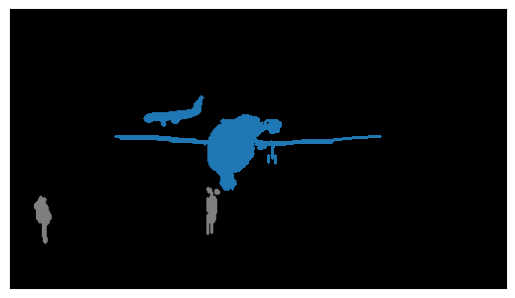

In [122]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

## Composed Transforms

### Inference Transforms

In [123]:
tr = transforms.inference_transforms(transforms.PASCAL_VOC_2012_MEAN, transforms.PASCAL_VOC_2012_STD)

In [124]:
input_sample = ds_train_v2[0]

In [125]:
img, mask = tr(input_sample)

In [126]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.float32; shape=torch.Size([3, 256, 256]); minmax=[-2.1179039478302, 2.640000104904175]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 256, 256]); minmax=[0, 15]


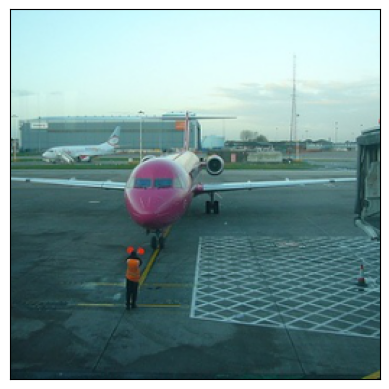

In [127]:
visualize.imshow_tensor(tr_inv_norm(img))

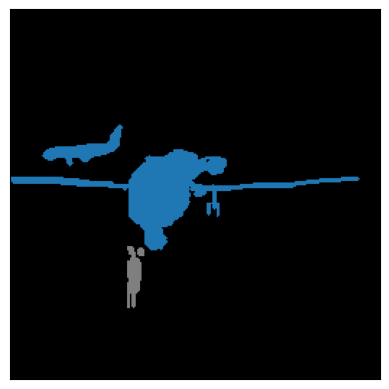

In [128]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

### Training Transforms with augmentation

In [129]:
tr = transforms.train_transforms(transforms.PASCAL_VOC_2012_MEAN, transforms.PASCAL_VOC_2012_STD)

In [130]:
input_sample = ds_train_v2[0]

In [131]:
img, mask = tr(input_sample)

In [132]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torchvision.datapoints._image.Image'>; dtype=torch.float32; shape=torch.Size([3, 256, 256]); minmax=[-2.1179039478302, 2.640000104904175]
mask:  type=<class 'torchvision.datapoints._mask.Mask'>; dtype=torch.uint8; shape=torch.Size([1, 256, 256]); minmax=[0, 15]


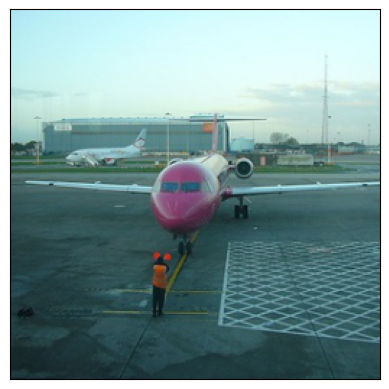

In [133]:
visualize.imshow_tensor(tr_inv_norm(img))

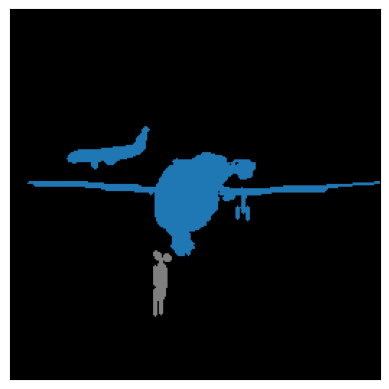

In [134]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask)[0,:])

## Complete Dataset transforms

In [135]:
import datasets

In [136]:
ds_train, ds_val = datasets.make_datasets(datadir='../data/')

In [137]:
val_dataloader = torch.utils.data.DataLoader(ds_val, batch_size=8, shuffle=False)

In [138]:
train_dataloader = torch.utils.data.DataLoader(ds_train, batch_size=8, shuffle=False)

In [139]:
img, mask = next(iter(train_dataloader))

In [140]:
print("img: ", tensorinfo(img))
print("mask: ", tensorinfo(mask))

img:  type=<class 'torch.Tensor'>; dtype=torch.float32; shape=torch.Size([8, 3, 256, 256]); minmax=[-2.1179039478302, 2.640000104904175]
mask:  type=<class 'torch.Tensor'>; dtype=torch.uint8; shape=torch.Size([8, 1, 256, 256]); minmax=[0, 20]


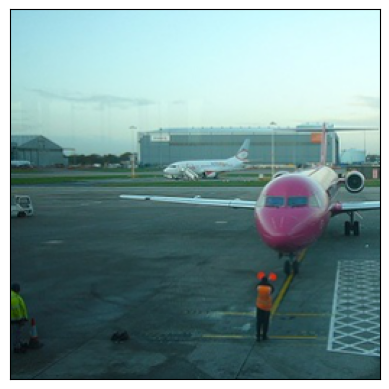

In [141]:
visualize.imshow_tensor(tr_inv_norm(img[0,:]))

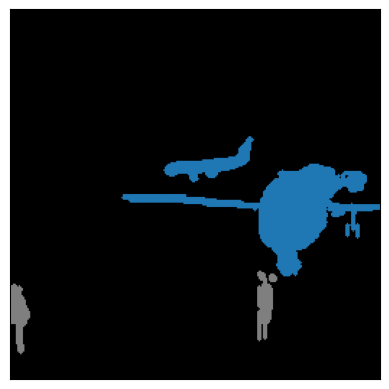

In [142]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask[:,0,:,:])[0])

In [143]:
img, mask = next(iter(val_dataloader))

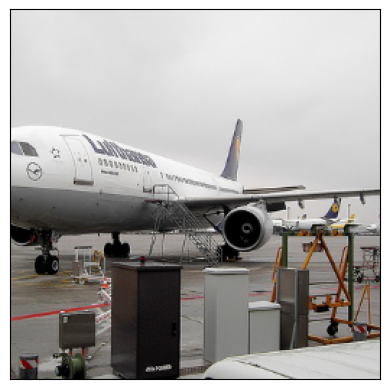

In [144]:
visualize.imshow_tensor(tr_inv_norm(img[0,:]))

In [145]:
mask.shape

torch.Size([8, 1, 256, 256])

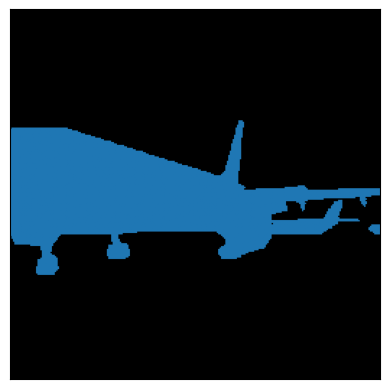

In [146]:
visualize.imshow_tensor(visualize.classmask_to_colormask(mask[:,0,:,:])[0])